In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

生成一些数据 

$y=0.05+\sum_{i=1}^d 0.01x_i+\varepsilon\,\text{where}\,\varepsilon\,\sim N(0,0.01^2)$


In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
# 初始化模型参数
def init_params():
    w = torch.normal(0, 1, (num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]


# 定义L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [4]:
def train(lamb):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss  # net是一个匿名函数
    # =>net(X)<=> linreg(X,w,b) # 其中w,b是捆绑好的参数,X是每次都调用net(X)时新传入的
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项
            l = loss(net(X), y) + lamb * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是:', torch.norm(w).item())

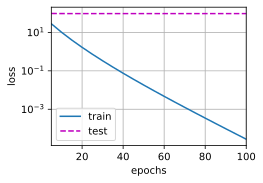

In [5]:
train(lamb=0)

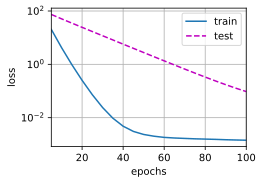

In [6]:
train(lamb=3)

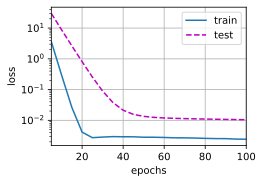

In [7]:
train(lamb=10)

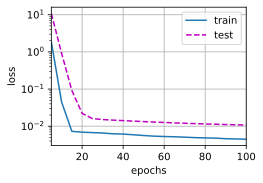

In [8]:
train(lamb=20)

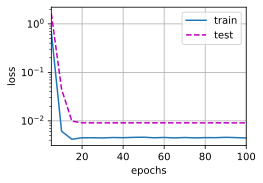

In [9]:
train(lamb=30)

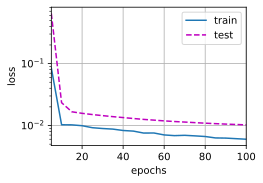

In [10]:
train(lamb=40)

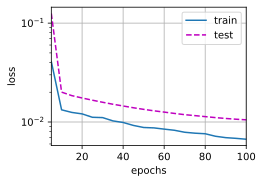

In [11]:
train(lamb=50)

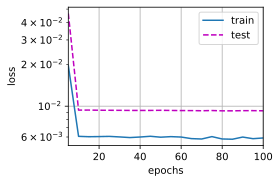

In [12]:
train(lamb=60)

In [13]:
# 20个样本, 过拟合是正常现象, 难以避免, 再提高λ就欠拟